<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: - Ames Housing Data and Kaggle Challenge


## Content:

- [Library & dataset imports](#Importing-libraries-and-our-cleaned-datasets)
- [Modelling of clean dataset](#Trying-to-model-the-clean-dataset)
- [Modifying Predictors](#Modifying-Predictors)
- [Finalize Predictors](#Finalize-Predictors)
- [Model 1: Baseline Model](#Model-1:-Baseline-Model)
- [Model 2: Baseline Model with Polynomial features and scaling](#Model-2:-Model-with-Polynomial-features-and-scaling)
- [Model 3: Model 2 with Ridge Regularization](#Model-3:-Model-2-with-Ridge-regularization)
- [Model 4: Model 2 with Lasso Regularization](#Model-4:-Model-3-with-Lasso)
- [LINEM Assumptions](#Assumptions)
- [Summary](#Summary)
- [Conclusion](#Conclusion)
- [Export to Kaggle](#Applying-model-3-to-kaggle)

### Importing libraries and our cleaned datasets

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
train = pd.read_csv("../datasets/final_train.csv")
test = pd.read_csv("../datasets/final_test.csv")

In [3]:
print (f"train shape : {train.shape}")
print (f"test shape: {test.shape}")

train shape : (2049, 209)
test shape: (878, 199)


In [4]:
# Setting id as dtype so it will not be use as a feature
train.id = train.id.astype(object)
test.id = test.id.astype(object)

## Trying to model the clean dataset

### Assemble X (predictors) and y (Target)

In [5]:
X1 = train.drop('saleprice',axis=1)
y1 = train['saleprice'] 

### Train/test split

In [6]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state = 42)

In [7]:
X1_test.shape

(513, 208)

In [8]:
y1_test.shape

(513,)

### Instantiate and fit the model

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X1_train, y1_train)

LinearRegression()

 ### Model evaluation

In [11]:

y1_pred = lr.predict(X1_test)

# Check the R^2 and MSE on the training and testing sets.
print(f'R^2 on testing set: {lr.score(X1_test,y1_test)}')
print(f'R^2 on training set: {lr.score(X1_train,y1_train)}')
print(f'Cross validation score: {cross_val_score(lr,X1_train,y1_train,cv=5).mean()}\n')

print(f'RMSE on testing set: {(mean_squared_error(y1_test, y1_pred))**0.5}')
print(f'RMSE on training set: {(mean_squared_error(y1_train, lr.predict(X1_train)))**0.5}')

R^2 on testing set: 0.9152164958086273
R^2 on training set: 0.9303289884943696
Cross validation score: 0.8901685783742861

RMSE on testing set: 23151.911939337966
RMSE on training set: 20904.487247500532


In [12]:
train.saleprice.mean()

181479.01805758907

In [13]:
set(zip(X1.columns, lr.coef_))

{('3ssn_porch', 11.679569887677872),
 ('alley_NA', -377.82180279984186),
 ('alley_Pave', -2976.621280088221),
 ('bedroom_abvgr', -3868.8985211590766),
 ('bldg_type_2fmCon', 29229.655000617102),
 ('bldg_type_Duplex', -3005.89043547205),
 ('bldg_type_Twnhs', 1674.9213709690805),
 ('bldg_type_TwnhsE', 6343.6152900675015),
 ('bsmt_cond', -5272.368969375966),
 ('bsmt_exposure', 4383.801323694549),
 ('bsmt_full_bath', 3300.996749152159),
 ('bsmt_half_bath', 1237.8128845501426),
 ('bsmt_qual', 1995.618673325432),
 ('bsmt_unf_sf', -3.6507460858017566),
 ('bsmtfin_sf_1', 19.074044497393515),
 ('bsmtfin_sf_2', 3.8401392807359116),
 ('bsmtfin_type_1', -492.9928410319873),
 ('bsmtfin_type_2', 850.8220641163002),
 ('central_air_Y', -3704.5763792198845),
 ('condition_1_Feedr', 8477.839410772198),
 ('condition_1_Norm', 12630.566703802406),
 ('condition_1_PosA', 18138.22953533703),
 ('condition_1_PosN', 23316.7753491857),
 ('condition_1_RRAe', -1734.1899337158795),
 ('condition_1_RRAn', 6330.638424800

### Interpretation

Lets compare the $R^2$ of both tests:
- The $R^2$ score for both sets are very high, 0.91 for testing and 0.93 for training.
- The score represents that 91% / 93% of _saleprice_ is explained by the _x_-variables in our model.
- This is expected as we used all of the columns provided.
- The Test and Cross Val are pretty similar, which indicates that it is a representative of the test set.

Let us look at the Root Mean Square Error,$RMSE$. 
- $RMSE$ represents the (approximately) average distance from the predicted value.
- The $RMSE$ for the training set is USD 20,904 (rounded), this means that we have an error of the $RMSE$ from the mean which is USD 181,479(rounded).
- The $RMSE$ for the test set is slightly higher at USD 23,161.
- The goal is to make $RMSE$ as low as possible so that the model will have a better accuracy of the saleprice.

The interpretation for variables is as follows:
- The variables were catergorized into:
    1. Discrete:
        - Example: bsmt_full_bath', 3300.996749152159
        - Holding all other variables constant, for every full bathroom in the basement, saleprice will increase by USD 3300
    2. Continuous:
        - Example: 'lot_area', 0.8791804911014491
        - Holding all other variables constant, for every unit increase in lot size, saleprice will increase by USD 0.87
    3. Ordinal: (Ordinal variables are variables with a natural order. We ranked the variables with 0 being not applicable and start with 1 being the lowest tier category) 
        - Example: 'lot_shape', 1728.2457675446183
        - Holding all other variables constant, for each increase in the tier, saleprice will increase by USD 1728.24
    4. Nominal: (Nominal variables are variables without a natural order.)
        - Example: 'neighborhood_Blueste', 7741.504393936433
        - Holding all other variables constant, if a house is in the neighbourhood, Bluestem, the saleprice will increase by USD 7741.50
        
        
**As good as the scores seems, this is definitely an overfitted model as we used all the features for the model.**

### Modifying Predictors

I have decided to only select features with correlation of 0.5< & -0.5>

These are the features and their corr:


|Features|Correlation|
|---|---|
|overall_qual|0.803462|
|gr_liv_area|0.719463|
|exter_qual|0.715048|
|kitchen_qual|0.694295|
|total_bsmt_sf|0.665116|
|garage_area|0.655097|
|garage_cars|0.648227|
|bsmt_qual|0.613236|
|year_built|0.572405|
|garage_finish|0.558566|
|year_remod/add|0.550872|
|fireplace_qu|0.539484|
|full_bath|0.538225|
|foundation_PConc|0.529500|
|mas_vnr_area|0.511273|
|totrms_abvgrd|0.509775|


In [14]:
train.corr().saleprice.sort_values(ascending=False)

saleprice               1.000000
overall_qual            0.803462
gr_liv_area             0.719463
exter_qual              0.715048
kitchen_qual            0.694295
total_bsmt_sf           0.665116
garage_area             0.655097
garage_cars             0.648227
bsmt_qual               0.613236
year_built              0.572405
garage_finish           0.558566
year_remod/add          0.550872
fireplace_qu            0.539484
full_bath               0.538225
foundation_PConc        0.529500
mas_vnr_area            0.511273
totrms_abvgrd           0.509775
fireplaces              0.473783
heating_qc              0.458636
neighborhood_NridgHt    0.448639
bsmtfin_sf_1            0.446103
bsmt_exposure           0.426134
sale_type_New           0.360599
garage_type_Attchd      0.358104
ms_subclass_60          0.356092
bsmtfin_type_1          0.350728
exterior_1st_VinylSd    0.342156
open_porch_sf           0.338545
exterior_2nd_VinylSd    0.337571
wood_deck_sf            0.327629
mas_vnr_ty

In [15]:
X_base = train[['overall_qual',
'gr_liv_area',
'exter_qual',
'kitchen_qual',
'total_bsmt_sf',
'garage_area',
'garage_cars',
'bsmt_qual',
'year_built',
'garage_finish',
'year_remod/add',
'fireplace_qu',
'full_bath',
'foundation_PConc',
'mas_vnr_area',
'totrms_abvgrd']]

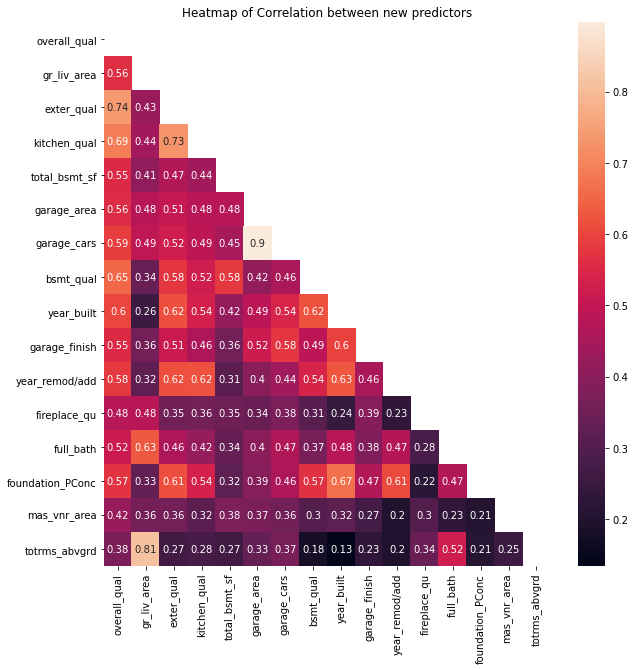

In [16]:
# Checking for Independence within predictors
plt.figure(figsize=(10,10))
sns.heatmap(X_base.corr(),annot=True, mask = np.triu(X_base.corr()))
plt.title('Heatmap of Correlation between new predictors')
plt.savefig("../images/Modifying_pred_Corr",bbox_inches='tight')

There are some variables that have very high correlation:
   - Overall quality with External quality at 0.74
   - Overall quality with kitchen quality is 0.69
   - Overall quality with Basement quality is 0.65
   - Overall quality with Fireplace quality is 0.48
   
   
 I will only retain overall quality as they are all pointing to quality and assuming that overall quality has all the other quality variables callibrated into it.
 
   
   - Garage area and garage cars at 0.90
 
 
 I will retain garage area as both are pointing to the size of the garage.


   - Year Built and Year remod/add at 0.63

I will retain year remod/add as it contains the updated year that the house has last been remod/add. I have ensure that if there were no remod/add done, it will retain as the year that was built. (Refer to index 7 at the table below.)

 There seem to be a high correlation between **'Total rooms above grade'** and **'Above grade (ground) living area square feet'**. However,  it is also possible to have less rooms with huge area spaces and vice versa, therefore I will retain both variables.

In [17]:
X_base[['year_built','year_remod/add']].head(8)

,year_built,year_remod/add
0,1976,2005
1,1996,1997
2,1953,2007
3,2006,2007
4,1900,1993
5,1966,2002
6,2005,2006
7,1959,1959


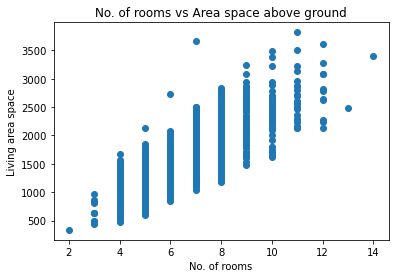

In [18]:
plt.title('No. of rooms vs Area space above ground')
plt.xlabel('No. of rooms')
plt.ylabel('Living area space')
plt.scatter(x ='totrms_abvgrd', y = 'gr_liv_area',data = X_base);

In [19]:
X_base = train[['overall_qual',
'gr_liv_area',
'total_bsmt_sf',
'garage_area',
'garage_finish',
'year_remod/add',
'full_bath',
'foundation_PConc',
'mas_vnr_area',
'totrms_abvgrd']]
y_base = train['saleprice']

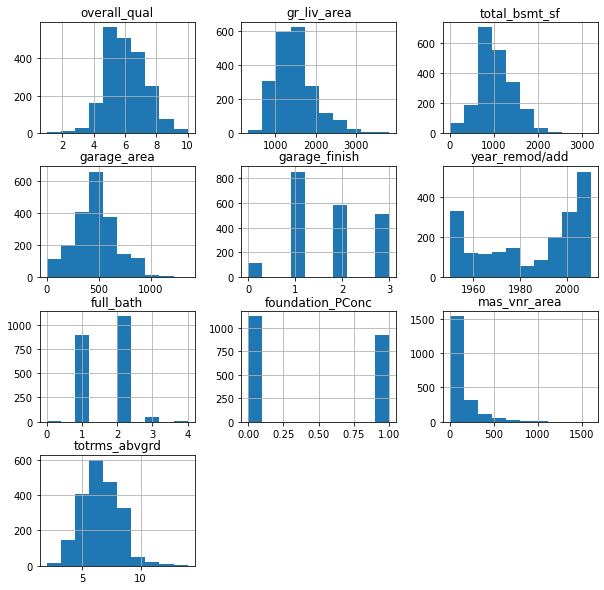

In [20]:
#Checking for Normality
X_base.hist(figsize=(10,10));
plt.savefig("../images/Modifying_pred_normality",bbox_inches='tight')

In [21]:
X_base.describe()

,overall_qual,gr_liv_area,total_bsmt_sf,garage_area,garage_finish,year_remod/add,full_bath,foundation_PConc,mas_vnr_area,totrms_abvgrd
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,6.108346,1495.553441,1053.035627,472.647633,1.721816,1984.166423,1.576867,0.450952,97.736945,6.428990
std,1.421780,485.783577,426.814420,214.703467,0.898522,21.032785,0.549389,0.497710,171.936400,1.544572
min,1.000000,334.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,2.000000
25%,5.000000,1128.000000,793.000000,319.000000,1.000000,1964.000000,1.000000,0.000000,0.000000,5.000000
50%,6.000000,1444.000000,994.000000,480.000000,2.000000,1993.000000,2.000000,0.000000,0.000000,6.000000
75%,7.000000,1728.000000,1317.000000,576.000000,2.000000,2004.000000,2.000000,1.000000,158.000000,7.000000
max,10.000000,3820.000000,3206.000000,1356.000000,3.000000,2010.000000,4.000000,1.000000,1600.000000,14.000000


In [22]:
X_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall_qual      2049 non-null   int64  
 1   gr_liv_area       2049 non-null   int64  
 2   total_bsmt_sf     2049 non-null   float64
 3   garage_area       2049 non-null   float64
 4   garage_finish     2049 non-null   int64  
 5   year_remod/add    2049 non-null   int64  
 6   full_bath         2049 non-null   int64  
 7   foundation_PConc  2049 non-null   int64  
 8   mas_vnr_area      2049 non-null   float64
 9   totrms_abvgrd     2049 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 160.2 KB


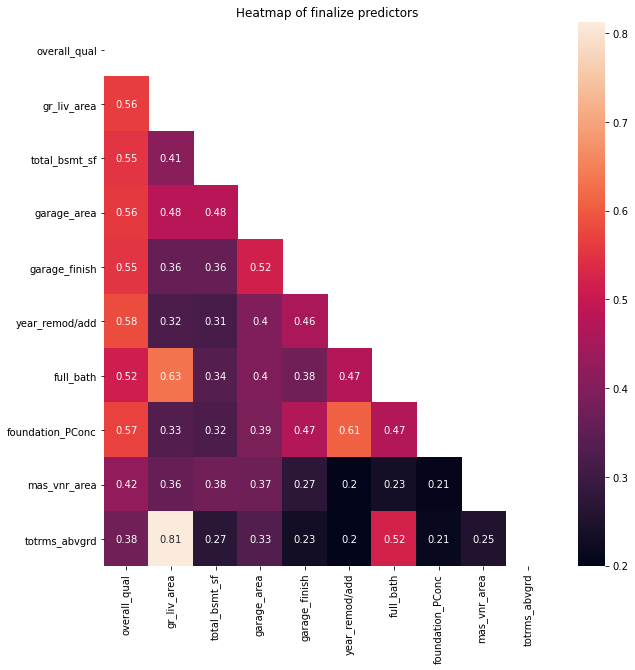

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(X_base.corr(),annot=True,mask=np.triu(X_base.corr()))
plt.title('Heatmap of finalize predictors')
plt.savefig("../images/Finalize_pred_Corr",bbox_inches='tight')

### Finalize Predictors

|Features|Correlation|
|---|---|
|overall_qual|0.803462|
|gr_liv_area|0.719463|
|total_bsmt_sf|0.665116|
|garage_area|0.655097|
|garage_finish|0.558566|
|year_remod/add|0.550872|
|full_bath|0.538225|
|foundation_PConc|0.529500|
|mas_vnr_area|0.511273|
|totrms_abvgrd|0.509775|

### Assemble Predictors(X) and Target(y)

In [24]:
X_base = train[['overall_qual',
'gr_liv_area',
'total_bsmt_sf',
'garage_area',
'garage_finish',
'year_remod/add',
'full_bath',
'foundation_PConc',
'mas_vnr_area',
'totrms_abvgrd']]
y_base = train['saleprice']

## Model 1: Baseline Model

### Train and split the model

In [25]:
Xbase_train, Xbase_test, ybase_train, ybase_test = train_test_split(X_base,y_base,random_state = 42)

### Instantiate and fit the model

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(Xbase_train, ybase_train)

LinearRegression()

### Model Evaluation

In [28]:
ybase_pred = lr.predict(Xbase_test)

# Check the R^2 RMSE on the training and testing sets.
print(f'R^2 on testing set: {lr.score(Xbase_test,ybase_test)}')
print(f'R^2 on training set: {lr.score(Xbase_train,ybase_train)}')
print(f'Cross validation score: {cross_val_score(lr,Xbase_train,ybase_train,cv=10).mean()}\n')

print(f'RMSE on testing set: {(mean_squared_error(ybase_test, ybase_pred))**0.5}')
print(f'RMSE on training set: {(mean_squared_error(ybase_train, lr.predict(Xbase_train)))**0.5}')

R^2 on testing set: 0.8593202562187927
R^2 on training set: 0.8311693817802799
Cross validation score: 0.8234376395240257

RMSE on testing set: 29822.700359061968
RMSE on training set: 32541.61232785688


Lets compare the $R^2$ of both tests:
- The $R^2$ score for both sets are high, 0.86 for testing and 0.83 for training.
- The score represents that 86% / 83% of _saleprice_ is explained by the _x_-variables in our model.
- The Test and Cross Val are pretty similar, which indicates that it is a representative of the test set.

Let us look at the Root Mean Square Error,$RMSE$. 
- $RMSE$ represents the (approximately) average distance from the predicted value.
- The $RMSE$ for the training set is USD 31,904 (rounded), this means that we have an error of the $RMSE$ from the mean which is USD 181,479(rounded).
- The $RMSE$ for the test set is slightly lower at USD 29779.
- The goal is to make $RMSE$ as low as possible so that the model will have a better accuracy of the saleprice.

Let us try creating some interaction terms and scale to see if the model works better

### Hypothesis testing


H0: Each finalize feature does not have an impact to the sale price.

HA: Each finalize feature have an impact to the sale price.

$$
\begin{eqnarray*}
&H_0:& \beta_{feature} = 0 \\
&H_A:& \beta_{feature} \neq 0
\end{eqnarray*}
$$

We will conduct this test assuming $\alpha=0.05$.




In [29]:
X_train = sm.add_constant(Xbase_train)

In [30]:
X_train.shape

(1536, 11)

In [31]:
model_sm = sm.OLS(ybase_train, X_train).fit()

In [32]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     750.8
Date:                Thu, 08 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:52:27   Log-Likelihood:                -18139.
No. Observations:                1536   AIC:                         3.630e+04
Df Residuals:                    1525   BIC:                         3.636e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.199e+05   1.07e+05     -7.632      0.000   -1.03e+06   -6.09e+05
overall_qual      1.595e+04    963.861     16.550      0.000    1.41e+04    1.78e+04
gr_liv_area         59.3697      3.545     16.746      0.000      52.416      66.324
total_bsmt_sf       39.6524      2.460     16.117      0.000      34.827      44.478
garage_area         40.8098      5.189      7.865      0.000      30.631      50.988
garage_finish     4980.1314   1186.816      4.196      0.000    2652.168    7308.095
year_remod/add     381.3288     55.186      6.910      0.000     273.079     489.578
full_bath        -8429.0541   2146.075     -3.928      0.000   -1.26e+04   -4219.483
foundation_PConc  8941.4254   2294.546      3.897      0.000    4440.625    1.34e+04
mas_vnr_area        47.1717      5.599      8.425      0.000      36.189      58.155
totrms_abvgrd     -968.3210    943.165     -1.027      0.305   -2818.358     881.716
==============================================================================
Omnibus:                      404.500   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3137.440
Skew:                           1.009   Prob(JB):                         0.00
Kurtosis:                       9.704   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the `model_sm.summary()` table, we can observed that the $p$-value for each feature except `totrms_abvgrd` is less than 0.001, this means that the $p < \alpha$ and we will reject $H_0$ and accept that they have an impact to predicting `sale price`.

For `totrms_abvgrd`, the $p$-value is 0.305. This means that the $p > \alpha$ and we fail to reject $H_0$.

## Model 2: Model with Polynomial features and scaling

### Instantiate the model and fit

In [33]:
poly = PolynomialFeatures(interaction_only=True,include_bias=False)

In [34]:
X_poly = poly.fit_transform(X_base)

In [35]:
cross_val_score(lr, X_poly, y_base, cv=5).mean()

0.8815576274401076

In [36]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_base, random_state = 42)

In [37]:
sc = StandardScaler()

In [38]:
X_ss_train = sc.fit_transform(X_poly_train)
X_ss_test = sc.transform(X_poly_test)

In [39]:
print(f'X_ss_train shape is: {X_ss_train.shape}')
print(f'y_poly_train shape is: {y_poly_train.shape}')
print(f'X_ss_test shape is: {X_ss_test.shape}')
print(f'y_poly_test shape is: {y_poly_test.shape}')

X_ss_train shape is: (1536, 55)
y_poly_train shape is: (1536,)
X_ss_test shape is: (513, 55)
y_poly_test shape is: (513,)


In [40]:
lr.fit(X_ss_train, y_poly_train)

LinearRegression()

In [41]:
y_poly_pred = lr.predict(X_ss_test)



print(f'R^2 on testing set: {lr.score(X_ss_test,y_poly_test)}')
print(f'R^2 on training set: {lr.score(X_ss_train,y_poly_train)}')
print(f'Cross validation score: {cross_val_score(lr,X_ss_train,y_poly_train,cv=5).mean()}\n')

print(f'RMSE on testing set: {(mean_squared_error(y_poly_test, y_poly_pred))**0.5}')
print(f'RMSE on training set: {(mean_squared_error(y_poly_train, lr.predict(X_ss_train)))**0.5}')

R^2 on testing set: 0.9017263760470908
R^2 on training set: 0.8895922615734666
Cross validation score: 0.8640107125057387

RMSE on testing set: 24925.832163267914
RMSE on training set: 26315.596492589902


### Interpretation

Lets compare the $R^2$ of both tests:
- The $R^2$ score for both sets have improved, 0.90 for testing and 0.89 for training.
- The score represents that 90% / 89% of _saleprice_ is explained by the _x_-variables in our model.
- The Test and Cross Val are pretty similar, which indicates that it is a representative of the test set.
-
Let us look at the Root Mean Square Error,$RMSE$.

- The $RSME$ for both sets have dropped.
- The $RMSE$ for the training set is USD 25,060 (rounded), this means that we have an error of the $RMSE$ from the mean which is USD 181,479(rounded).
- The $RMSE$ for the test set is lower at USD 24,767.
- The goal is to make $RMSE$ as low as possible so that the model will have a better accuracy of the saleprice.

With polynomialfeature for model 2, the model probably overfitted with the increase of predictors.

Let us try to futher improve model 2 with regularization using Ridge and Lasso as model 3.

## Model 3: Model 2 with Ridge regularization

### This is the chosen model

   ### Instantiate PolynomialFeatures 

In [42]:
poly = PolynomialFeatures(interaction_only=True,include_bias=False)

### Fit and transform X

In [43]:
X_overfit = poly.fit_transform(X_base)

In [44]:
X_overfit_df = pd.DataFrame(X_overfit,columns = poly.get_feature_names(X_base.columns))

### Create train/test split

In [45]:
X_ridge_train, X_ridge_test, y_ridge_train, y_ridge_test = train_test_split(
X_overfit_df, y_base,random_state=42)

In [46]:
sc = StandardScaler()

### Scaling the data

In [47]:
Z_ridge_train = sc.fit_transform(X_ridge_train)
Z_ridge_test = sc.transform(X_ridge_test)

In [48]:
print(f'Z_train shape is: {Z_ridge_train.shape}')
print(f'y_train shape is: {y_ridge_train.shape}')
print(f'Z_test shape is: {Z_ridge_test.shape}')
print(f'y_test shape is: {y_ridge_test.shape}')

Z_train shape is: (1536, 55)
y_train shape is: (1536,)
Z_test shape is: (513, 55)
y_test shape is: (513,)


In [49]:
lr = LinearRegression()

In [50]:
lr.fit(Z_ridge_train, y_ridge_train)
print(f"Training score:{lr.score(Z_ridge_train, y_ridge_train)}")
print(f"Test score:{lr.score(Z_ridge_test, y_ridge_test)}")


Training score:0.8895922615734666
Test score:0.9017263760470908


### creating a 100 equally space alpha equally between 0 and 5 

In [51]:
alphas = np.logspace(0,5,100)

### Instantiate and fit ridge model  

In [52]:
ridge_cv = RidgeCV(alphas = alphas, cv = 5 ,scoring='r2')
ridge_cv.fit(Z_ridge_train,y_ridge_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [53]:
# Optimal value of alpha
ridge_cv.alpha_

36.78379771828632

In [54]:
# Coefficients of ridge CV
ridge_cv.coef_

array([-1346.76380551,   605.17188458,  -592.73645222, -2492.44959082,
       -1098.16325774,  8312.28807791, -3345.11497123, -4684.62132694,
       -3590.6424116 , -5748.6373958 , 13482.0027199 , 19233.00469264,
        9284.5066977 ,  6116.6762117 ,  -262.93727161,  1667.35217849,
         298.1193171 , -2076.68845034,  8865.06337309,  6443.0407023 ,
        5718.31375089,  5932.10240107,  2052.75913346,  9842.54782075,
        4376.93015475, -1329.75647323,  1062.05053333,   965.64946643,
        4427.17888448,   608.9519999 , -6044.42692031,  3542.4821597 ,
        4982.74903444, -2046.50452097,  -827.04771462, -1594.8239086 ,
       -1472.11220492,  1212.51238064,  1588.08079589,  2638.39439818,
        -544.24604481, -3288.67275372, -1288.44705557, -3584.4936535 ,
        -121.41098236, -1930.40064122, -4612.97907899, -3226.42473496,
       -4299.90854355,  -126.00515228,  -755.57853885,  3033.59293819,
        5944.82255035,  4860.15267016,  8517.8550949 ])

In [55]:
y_ridge_pred = ridge_cv.predict(Z_ridge_test)



print(f'R^2 on testing set: {ridge_cv.score(Z_ridge_test,y_ridge_test)}')
print(f'R^2 on training set: {ridge_cv.score(Z_ridge_train,y_ridge_train)}')
print(f'Cross validation score: {cross_val_score(ridge_cv,Z_ridge_train,y_ridge_train,cv=5).mean()}\n')

print(f'RMSE on testing set: {(mean_squared_error(y_ridge_test, y_ridge_pred))**0.5}')
print(f'RMSE on training set: {(mean_squared_error(y_ridge_train, ridge_cv.predict(Z_ridge_train)))**0.5}')

R^2 on testing set: 0.9049626442256957
R^2 on training set: 0.8815617582176615
Cross validation score: 0.867618511850236

RMSE on testing set: 24511.977701801687
RMSE on training set: 27255.83160851632


### Model 4: Model 3 with Lasso 

   ### Instantiate PolynomialFeatures 

In [56]:
poly = PolynomialFeatures(interaction_only=True,include_bias=False)

### Fit and transform X

In [57]:
X_overfit = poly.fit_transform(X_base)

### Create train/test split

In [58]:
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(
X_overfit, y_base,random_state=42)

In [59]:
sc = StandardScaler()

### Scaling the data

In [60]:
Z_lasso_train = sc.fit_transform(X_lasso_train)
Z_lasso_test = sc.transform(X_lasso_test)

In [61]:
print(f'Z_train shape is: {Z_lasso_train.shape}')
print(f'y_train shape is: {y_lasso_train.shape}')
print(f'Z_test shape is: {Z_lasso_test.shape}')
print(f'y_test shape is: {y_lasso_test.shape}')

Z_train shape is: (1536, 55)
y_train shape is: (1536,)
Z_test shape is: (513, 55)
y_test shape is: (513,)


In [62]:
lr = LinearRegression()

In [63]:
lr.fit(Z_lasso_train, y_lasso_train)
print(f"Training score:{lr.score(Z_lasso_train, y_lasso_train)}")
print(f"Test score:{lr.score(Z_lasso_test, y_lasso_test)}")


Training score:0.8895922615734666
Test score:0.9017263760470908


In [64]:
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(n_alphas=1000, cv=5,max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_lasso_train, y_lasso_train)

LassoCV(cv=5, max_iter=50000, n_alphas=1000)

In [65]:
lasso_cv.alpha_

226.86140054948984

In [66]:
y_lasso_pred = lasso_cv.predict(Z_lasso_test)



print(f'R^2 on testing set: {lasso_cv.score(Z_lasso_test,y_lasso_test)}')
print(f'R^2 on training set: {lasso_cv.score(Z_lasso_train,y_lasso_train)}')
print(f'Cross validation score: {cross_val_score(lasso_cv,Z_lasso_train,y_lasso_train,cv=5).mean()}\n')

print(f'RMSE on testing set: {(mean_squared_error(y_lasso_test, y_lasso_pred))**0.5}')
print(f'RMSE on training set: {(mean_squared_error(y_lasso_train, lasso_cv.predict(Z_lasso_train)))**0.5}')

R^2 on testing set: 0.9033306900659765
R^2 on training set: 0.8808761936601722
Cross validation score: 0.8678294309441474

RMSE on testing set: 24721.53822097118
RMSE on training set: 27334.601227119136


## Assumptions

### These are the assumptions for model 3

### Linearity

<Figure size 1440x1440 with 0 Axes>

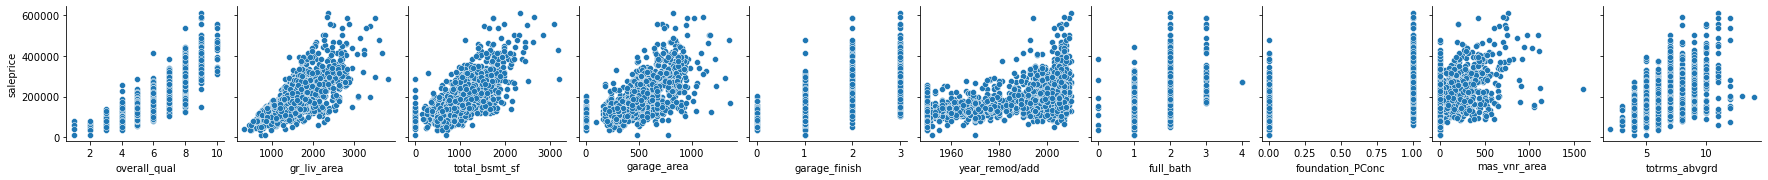

In [67]:
# Checking for Linearity

plt.figure(figsize=(20,20))

sns.pairplot(train, x_vars=['overall_qual',
'gr_liv_area',
'total_bsmt_sf',
'garage_area',
'garage_finish',
'year_remod/add',
'full_bath',
'foundation_PConc',
'mas_vnr_area',
'totrms_abvgrd'], y_vars=['saleprice'],diag_kind=None);
plt.savefig("../images/Assumptions_ver_L",bbox_inches='tight')

### Independence

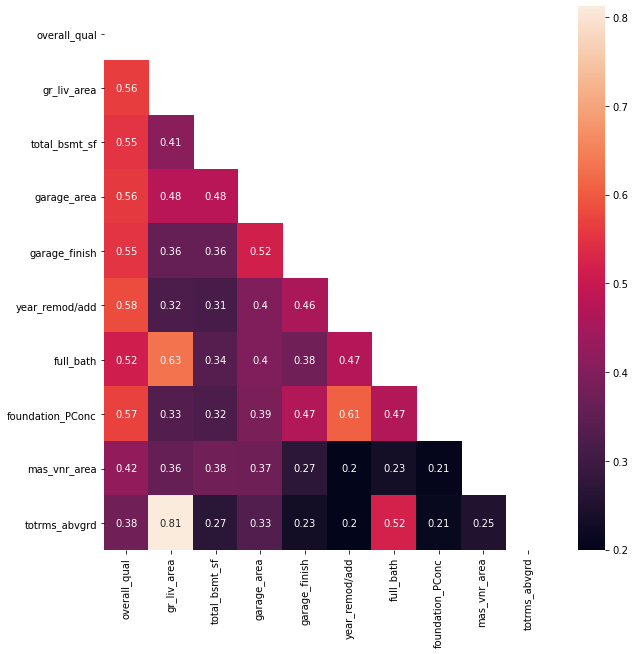

In [68]:
# Checking for Independence within predictors
plt.figure(figsize=(10,10))
sns.heatmap(X_base.corr(),annot=True, mask = np.triu(X_base.corr()))
plt.savefig("../images/Assumptions_I",bbox_inches='tight')

### Normality

In [69]:
residual = y_ridge_test - y_ridge_pred

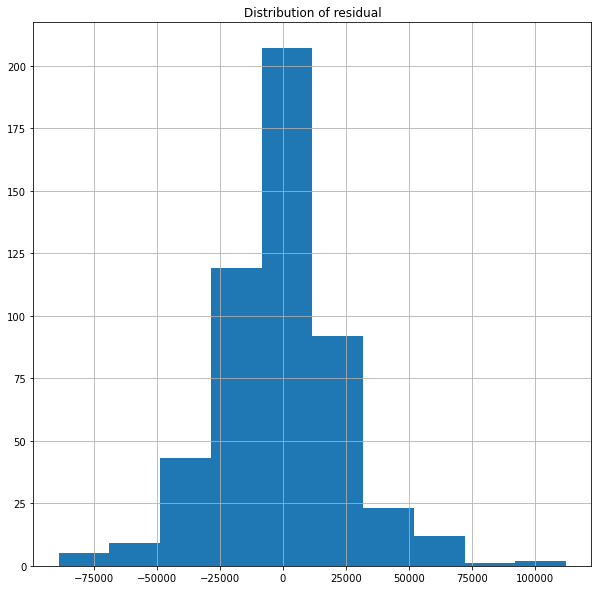

In [70]:
#Checking for Normality
plt.title('Distribution of residual')
residual.hist(figsize=(10,10));
plt.savefig("../images/Assumptions_N",bbox_inches='tight')

### Error of variance

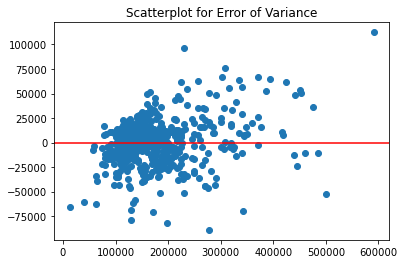

In [71]:
plt.scatter(y_ridge_test, residual)
plt.title('Scatterplot for Error of Variance')
plt.axhline(0,color='r')
plt.savefig("../images/Assumptions_E",bbox_inches='tight')

### Multicollinearity 

Ridge regression helps with Multicollinearity. 

## Summary


|Model|Set|R^2|Cross Val Score|RMSE|
|---|---|---|---|---|
|Overfit|Test| 0.9152|0.8901|23151|
|Overfit|Train| 0.9303|0.8901|20904|
|Baseline|Test|0.8593|0.8234|29822|
|Baseline|Train|0.8311|0.8234|32541|
|Model 2|Test|0.9017|0.8640|24925|
|Model 2|Train|0.8895|0.8640|26315|
|**Model 3**|**Test**|**0.9049**|**0.8767**|**24511**|
|**Model 3**|**Train**|**0.8815**|**0.8676**|**27255**|
|Model 4|Test| 0.9033|0.8678|24721|
|Model 4|Train|0.8808|0.8678|27334|


Model 2 - Baseline with Polynomial Feature and Standard Scaler

Model 3 - Model 2 with Ridge regularization

Model 4 - Model 2 with Lasso regularization

---
We officially started off with the baseline model narrowing down to correlated variables as our predictors with correlation above 0.5 & below -0.5. However we did not come across any -0.5 correlated variables. The statistics used in this regression to evaluate model fit were $R^2$ and $RMSE$. $R^2$ is the proportional improvement in prediction from the regression model, indicates the goodness of fit of the model. $RMSE$ is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. Lower values of RMSE indicate better fit.

The baseline model came back with $R^2$ of 0.8593(test), 0.8311(training), 0.8234(CVscore). From the scores we can interpret that the model is well fitted as they are fairly similar. The $RMSE$ on the other hand return 29,822(test) and 32,541(training), what this means is that there will be an approximated (+/-) error(RMSE) from the mean. 
This sets the benchmark of our models and we aim to further improve by increasing the $R^2$ and lowering the $RMSE$. Best would be we could reach somewhere close to the scores of the overfitted model without overfitting.   

Model 2 is a modification of the baseline model, introducing interactive terms and scaling. Interactive terms were created using PolynomialFeature with interactive only set to true as I am unsure how to infer $predictor^2$. The predictors were all scaled to Z-scores using StandardScalar. The $R^2$ scores for both sets improved to 0.9017(test), 0.8895(training) and 0.8640(CVscore), the model continues to be well fitted. $RSME$ also improved with 24,925(test) and 26,315(training). That was an approximate USD 5000 decrease in the $RMSE$ for both sets. However, this might be due to the added predictors with the interactive terms resulting the model to be overfitted. 

Model 3 is an enhanced version of model 2 with Regularization. Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It reduces model variance and thus minimizes overfitting. If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize. For model 3 , ridge regularization was applied to the model to shrink the coefficients by bringing it close to 0. Model 3 scores were further improved with $R^2$ at 0.9049(test), 0.8815(training) and 0.8676(CVscore) and $RMSE$ at 24,511(test) & 27,255(training). The $R^2$ scores in general were still relatively consistent and continue to show that it is a good fit. $RMSE$ has also taken another dip of approximately USD 1,000.

Model 4 similarly like model 3 is an enhanced version of model 2 but using Lasso Regularization instead. Ridge regularization shrinks the coefficients by bringing it close to 0 but Lasso shrinks the coefficients by directing it towards 0. Model 4 returns fairly similar results to Model 3 with $R^2$ at 0.9033(test) ,0.8808(training) and 0.8678(CVScore) & $RMSE$ at 24,721(test) and 27,334(training).

References:
[Assessing the Fit of Regression Models](https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/)

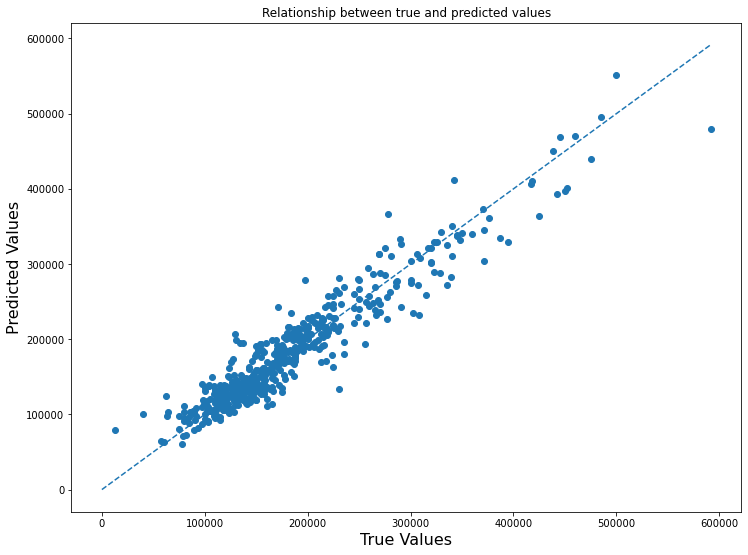

In [72]:
plt.figure(figsize=(12,9))
# Examine the relationship between observed and predicted values.
plt.scatter(y_ridge_test, y_ridge_pred)

# Line showing perfect predictions.
plt.plot([0,max(max(y_ridge_test),max(y_ridge_pred))],
        [0,max(max(y_ridge_test),max(y_ridge_pred))],
        linestyle = '--')

plt.title('Relationship between true and predicted values')
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);
plt.savefig("../images/Accuracy_of_model",bbox_inches='tight')

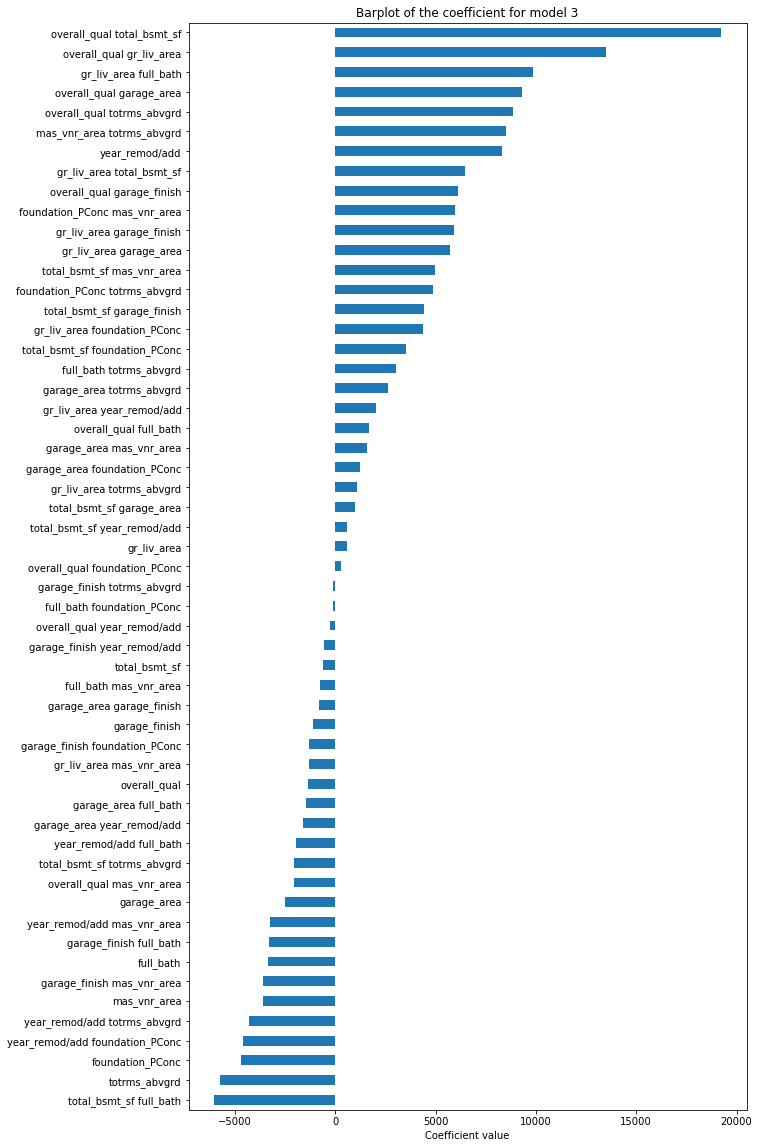

In [73]:
# Barplot for ridge coef_
pd.Series(ridge_cv.coef_, index=X_ridge_train.columns).sort_values().plot.barh(figsize=(10, 20))
plt.xlabel('Coefficient value')
plt.title('Barplot of the coefficient for model 3');


## Conclusion

In conclusion, with the baseline model enginnered with polynomialfeature to create interactive terms, scaling and ridge regularization. We came up with model 3 which returned the best results, both $R^2$ and $RMSE$ were pretty close to the overfitted set. Most importantly, with the test $R^2$ score of model 3: we achieve an accuracy of **90.4%**  which is higher than our goal, 85% accuracy, hooray! This will enable real estate agents to engage home seller with better house prices using the features that were recommended, mitigating the misconception of real estate agents. For future plans, I can explore by removing features that return negative coefficient based on the chart above to see if there will be a improvement to the model. With our current resources, Model 3 have been chosen to submit to Kaggle.

### Applying model 3 to kaggle

In [74]:
X_train = train[['overall_qual',
'gr_liv_area',
'total_bsmt_sf',
'garage_area',
'garage_finish',
'year_remod/add',
'full_bath',
'foundation_PConc',
'mas_vnr_area',
'totrms_abvgrd']]
y_train = train['saleprice']
X_test = test[['overall_qual',
'gr_liv_area',
'total_bsmt_sf',
'garage_area',
'garage_finish',
'year_remod/add',
'full_bath',
'foundation_PConc',
'mas_vnr_area',
'totrms_abvgrd']]

In [75]:
pf = PolynomialFeatures(interaction_only=True,include_bias=False)

In [76]:
pf.fit(X_train)

PolynomialFeatures(include_bias=False, interaction_only=True)

In [77]:
X_train = pd.DataFrame(pf.transform(X_train), columns = pf.get_feature_names(X_train.columns))

In [78]:
X_train.head()

,overall_qual,gr_liv_area,total_bsmt_sf,garage_area,garage_finish,year_remod/add,full_bath,foundation_PConc,mas_vnr_area,totrms_abvgrd,overall_qual gr_liv_area,overall_qual total_bsmt_sf,overall_qual garage_area,overall_qual garage_finish,overall_qual year_remod/add,overall_qual full_bath,overall_qual foundation_PConc,overall_qual mas_vnr_area,overall_qual totrms_abvgrd,gr_liv_area total_bsmt_sf,gr_liv_area garage_area,gr_liv_area garage_finish,gr_liv_area year_remod/add,gr_liv_area full_bath,gr_liv_area foundation_PConc,gr_liv_area mas_vnr_area,gr_liv_area totrms_abvgrd,total_bsmt_sf garage_area,total_bsmt_sf garage_finish,total_bsmt_sf year_remod/add,total_bsmt_sf full_bath,total_bsmt_sf foundation_PConc,total_bsmt_sf mas_vnr_area,total_bsmt_sf totrms_abvgrd,garage_area garage_finish,garage_area year_remod/add,garage_area full_bath,garage_area foundation_PConc,garage_area mas_vnr_area,garage_area totrms_abvgrd,garage_finish year_remod/add,garage_finish full_bath,garage_finish foundation_PConc,garage_finish mas_vnr_area,garage_finish totrms_abvgrd,year_remod/add full_bath,year_remod/add foundation_PConc,year_remod/add mas_vnr_area,year_remod/add totrms_abvgrd,full_bath foundation_PConc,full_bath mas_vnr_area,full_bath totrms_abvgrd,foundation_PConc mas_vnr_area,foundation_PConc totrms_abvgrd,mas_vnr_area totrms_abvgrd
0,6.0,1479.0,725.0,475.0,2.0,2005.0,2.0,0.0,289.0,6.0,8874.0,4350.0,2850.0,12.0,12030.0,12.0,0.0,1734.0,36.0,1072275.0,702525.0,2958.0,2965395.0,2958.0,0.0,427431.0,8874.0,344375.0,1450.0,1453625.0,1450.0,0.0,209525.0,4350.0,950.0,952375.0,950.0,0.0,137275.0,2850.0,4010.0,4.0,0.0,578.0,12.0,4010.0,0.0,579445.0,12030.0,0.0,578.0,12.0,0.0,0.0,1734.0
1,7.0,2122.0,913.0,559.0,2.0,1997.0,2.0,1.0,132.0,8.0,14854.0,6391.0,3913.0,14.0,13979.0,14.0,7.0,924.0,56.0,1937386.0,1186198.0,4244.0,4237634.0,4244.0,2122.0,280104.0,16976.0,510367.0,1826.0,1823261.0,1826.0,913.0,120516.0,7304.0,1118.0,1116323.0,1118.0,559.0,73788.0,4472.0,3994.0,4.0,2.0,264.0,16.0,3994.0,1997.0,263604.0,15976.0,2.0,264.0,16.0,132.0,8.0,1056.0
2,5.0,1057.0,1057.0,246.0,1.0,2007.0,1.0,0.0,0.0,5.0,5285.0,5285.0,1230.0,5.0,10035.0,5.0,0.0,0.0,25.0,1117249.0,260022.0,1057.0,2121399.0,1057.0,0.0,0.0,5285.0,260022.0,1057.0,2121399.0,1057.0,0.0,0.0,5285.0,246.0,493722.0,246.0,0.0,0.0,1230.0,2007.0,1.0,0.0,0.0,5.0,2007.0,0.0,0.0,10035.0,0.0,0.0,5.0,0.0,0.0,0.0
3,5.0,1444.0,384.0,400.0,3.0,2007.0,2.0,1.0,0.0,7.0,7220.0,1920.0,2000.0,15.0,10035.0,10.0,5.0,0.0,35.0,554496.0,577600.0,4332.0,2898108.0,2888.0,1444.0,0.0,10108.0,153600.0,1152.0,770688.0,768.0,384.0,0.0,2688.0,1200.0,802800.0,800.0,400.0,0.0,2800.0,6021.0,6.0,3.0,0.0,21.0,4014.0,2007.0,0.0,14049.0,2.0,0.0,14.0,0.0,7.0,0.0
4,6.0,1445.0,676.0,484.0,1.0,1993.0,2.0,1.0,0.0,6.0,8670.0,4056.0,2904.0,6.0,11958.0,12.0,6.0,0.0,36.0,976820.0,699380.0,1445.0,2879885.0,2890.0,1445.0,0.0,8670.0,327184.0,676.0,1347268.0,1352.0,676.0,0.0,4056.0,484.0,964612.0,968.0,484.0,0.0,2904.0,1993.0,2.0,1.0,0.0,6.0,3986.0,1993.0,0.0,11958.0,2.0,0.0,12.0,0.0,6.0,0.0


In [79]:
X_test = pd.DataFrame(pf.transform(X_test), columns = pf.get_feature_names(X_test.columns))

In [80]:
X_test.head()

,overall_qual,gr_liv_area,total_bsmt_sf,garage_area,garage_finish,year_remod/add,full_bath,foundation_PConc,mas_vnr_area,totrms_abvgrd,overall_qual gr_liv_area,overall_qual total_bsmt_sf,overall_qual garage_area,overall_qual garage_finish,overall_qual year_remod/add,overall_qual full_bath,overall_qual foundation_PConc,overall_qual mas_vnr_area,overall_qual totrms_abvgrd,gr_liv_area total_bsmt_sf,gr_liv_area garage_area,gr_liv_area garage_finish,gr_liv_area year_remod/add,gr_liv_area full_bath,gr_liv_area foundation_PConc,gr_liv_area mas_vnr_area,gr_liv_area totrms_abvgrd,total_bsmt_sf garage_area,total_bsmt_sf garage_finish,total_bsmt_sf year_remod/add,total_bsmt_sf full_bath,total_bsmt_sf foundation_PConc,total_bsmt_sf mas_vnr_area,total_bsmt_sf totrms_abvgrd,garage_area garage_finish,garage_area year_remod/add,garage_area full_bath,garage_area foundation_PConc,garage_area mas_vnr_area,garage_area totrms_abvgrd,garage_finish year_remod/add,garage_finish full_bath,garage_finish foundation_PConc,garage_finish mas_vnr_area,garage_finish totrms_abvgrd,year_remod/add full_bath,year_remod/add foundation_PConc,year_remod/add mas_vnr_area,year_remod/add totrms_abvgrd,full_bath foundation_PConc,full_bath mas_vnr_area,full_bath totrms_abvgrd,foundation_PConc mas_vnr_area,foundation_PConc totrms_abvgrd,mas_vnr_area totrms_abvgrd
0,6.0,1928.0,1020.0,440.0,1.0,1950.0,2.0,0.0,0.0,9.0,11568.0,6120.0,2640.0,6.0,11700.0,12.0,0.0,0.0,54.0,1966560.0,848320.0,1928.0,3759600.0,3856.0,0.0,0.0,17352.0,448800.0,1020.0,1989000.0,2040.0,0.0,0.0,9180.0,440.0,858000.0,880.0,0.0,0.0,3960.0,1950.0,2.0,0.0,0.0,9.0,3900.0,0.0,0.0,17550.0,0.0,0.0,18.0,0.0,0.0,0.0
1,5.0,1967.0,1967.0,580.0,3.0,1977.0,2.0,0.0,0.0,10.0,9835.0,9835.0,2900.0,15.0,9885.0,10.0,0.0,0.0,50.0,3869089.0,1140860.0,5901.0,3888759.0,3934.0,0.0,0.0,19670.0,1140860.0,5901.0,3888759.0,3934.0,0.0,0.0,19670.0,1740.0,1146660.0,1160.0,0.0,0.0,5800.0,5931.0,6.0,0.0,0.0,30.0,3954.0,0.0,0.0,19770.0,0.0,0.0,20.0,0.0,0.0,0.0
2,7.0,1496.0,654.0,426.0,2.0,2006.0,2.0,1.0,0.0,7.0,10472.0,4578.0,2982.0,14.0,14042.0,14.0,7.0,0.0,49.0,978384.0,637296.0,2992.0,3000976.0,2992.0,1496.0,0.0,10472.0,278604.0,1308.0,1311924.0,1308.0,654.0,0.0,4578.0,852.0,854556.0,852.0,426.0,0.0,2982.0,4012.0,4.0,2.0,0.0,14.0,4012.0,2006.0,0.0,14042.0,2.0,0.0,14.0,0.0,7.0,0.0
3,5.0,968.0,968.0,480.0,1.0,2006.0,1.0,0.0,0.0,5.0,4840.0,4840.0,2400.0,5.0,10030.0,5.0,0.0,0.0,25.0,937024.0,464640.0,968.0,1941808.0,968.0,0.0,0.0,4840.0,464640.0,968.0,1941808.0,968.0,0.0,0.0,4840.0,480.0,962880.0,480.0,0.0,0.0,2400.0,2006.0,1.0,0.0,0.0,5.0,2006.0,0.0,0.0,10030.0,0.0,0.0,5.0,0.0,0.0,0.0
4,6.0,1394.0,1394.0,514.0,2.0,1963.0,1.0,0.0,247.0,6.0,8364.0,8364.0,3084.0,12.0,11778.0,6.0,0.0,1482.0,36.0,1943236.0,716516.0,2788.0,2736422.0,1394.0,0.0,344318.0,8364.0,716516.0,2788.0,2736422.0,1394.0,0.0,344318.0,8364.0,1028.0,1008982.0,514.0,0.0,126958.0,3084.0,3926.0,2.0,0.0,494.0,12.0,1963.0,0.0,484861.0,11778.0,0.0,247.0,6.0,0.0,0.0,1482.0


In [81]:
sc = StandardScaler()

In [82]:
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

### creating a 100 equally space alpha equally between 0 and 5 

In [83]:
alphas = np.logspace(0,5,100)

### Instantiate and fit ridge model  

In [84]:
ridge_cv = RidgeCV(alphas = alphas, cv = 5 ,scoring='r2')
    ridge_cv.fit(Z_train,y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [85]:
# Optimal value of alpha
ridge_cv.alpha_

12.91549665014884

In [86]:
y_test = ridge_cv.predict(Z_test)


In [87]:
kaggle = pd.DataFrame(columns = ['Id','SalePrice'])
kaggle['Id'] = test.id
kaggle['SalePrice'] = y_test
kaggle.to_csv('../datasets/kaggle_sub.csv', index=False)